# Phase III: First ML Proof of Concept (5\%)

### Team Names:
- Melanie Yu
- Yunhan Luo
- Ani McCaskill
- Owen Sweetman

## Part 1: First ML model using Numpy
(3%) The implementation (using NumPy) of your first ML model as a function call to the cleaned data


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("csv_files/cleaned_video_data.csv")
df.head()

,video_id,title,published,views,likes,comments,duration,tags
0,9oYHU1hdDog,"Agents, AI & The Next Wave: Mike Clark on Vert...",2025-11-21T00:00:10Z,1590,42,13,7.379008,"['Google', 'developers', 'pr_pr: Google Develo..."
1,9EGtawwvlNs,Build an AI Agent with Gemini 3,2025-11-20T21:45:49Z,65403,2016,97,5.948035,"['Google', 'developers', 'pr_pr: AI DevRel (fk..."
2,sCXuCczPE8A,What's on the newsdesk for Google Developers t...,2025-11-20T20:00:55Z,3051,35,3,3.526361,"['Google', 'developers', 'pr_pr: Google for De..."
3,hunRGj4Bpb0,Keep your code fresh and clean with YAGNI!,2025-11-20T19:30:53Z,6688,176,6,3.526361,"['Google', 'developers', 'pr_pr: Google for De..."
4,L0QHMLx02l4,"Introducing ADK Go, User Simulator, and more! ...",2025-11-20T17:02:19Z,4880,126,4,4.882802,"['Google', 'developers', 'pr_pr: Google for De..."


y = 0.0197x + -0.0071



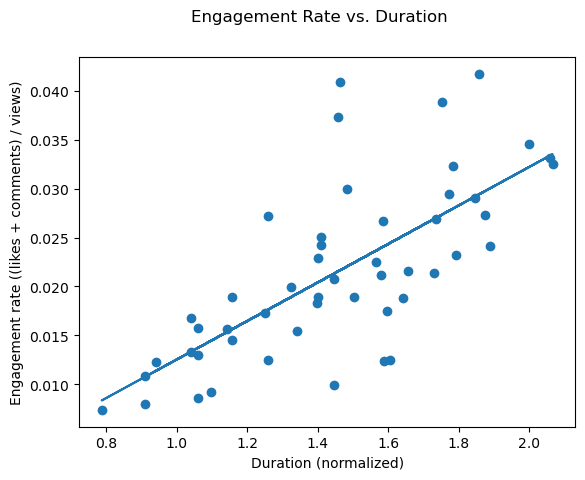

In [36]:
engagement_rate = ((df["likes"] + df["comments"]) / df["views"])
duration = np.log(df["duration"])

# add bias column
X = np.column_stack((np.ones(len(duration)), duration))
y = engagement_rate

m = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
print(f"y = {round(m[1], 4)}x + {round(m[0], 4)}")

xy_data = pd.DataFrame({'x': duration, 'y': engagement_rate})

plt.scatter(duration, engagement_rate)
plt.plot(duration, m[1]*duration+m[0])
plt.xlabel('Duration (normalized)')
plt.ylabel('Engagement rate ((likes + comments) / views)')
plt.suptitle('Engagement Rate vs. Duration')
print()

In [38]:
# TODO: residuals graphs

NameError: name 'residuals' is not defined

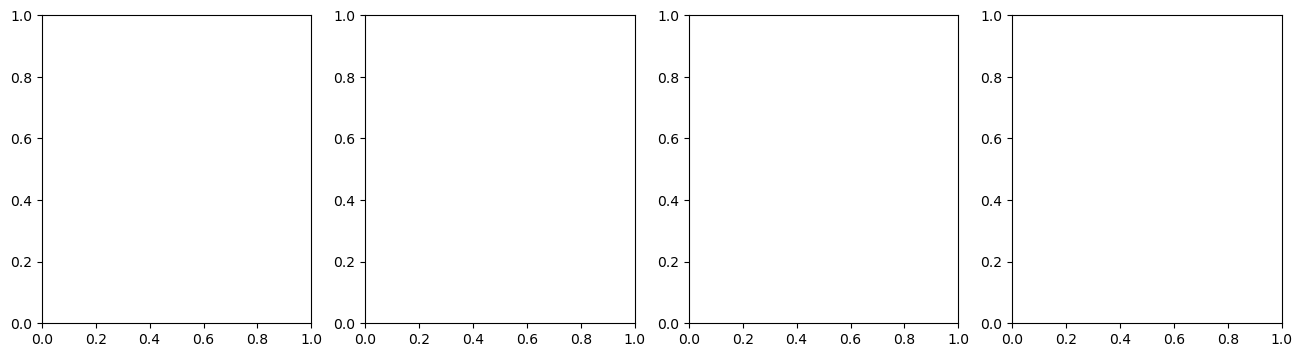

In [30]:
from scipy.stats import probplot

# Create 4-panel diagnostic plot
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot 1: Independence - Residuals vs Order
axes[0].scatter(range(len(residuals)), residuals, alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Independence: Residuals vs Order', size=11)
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Residuals')

# Plot 2: Homoscedasticity - Residuals vs Fitted
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Homoscedasticity: Residuals vs Fitted', size=11)
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')

# Plot 3: Normality - Q-Q Plot
probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Normality: Q-Q Plot')

# Plot 4: Normality - Histogram
axes[3].hist(residuals, bins=20, edgecolor='black', alpha=0.5)
axes[3].set_title('Normality: Residuals Histogram')
axes[3].set_xlabel('Residuals')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# TODO: measures of fit

TODO: ethical coniderations, conclusion etc

